In [1]:
# Installing the fairlearn package
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 1.9 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer



In [3]:
!pip install xlrd

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#reading file
file_path = '/content/default of credit card clients (1).xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

print(df)


X=df.drop(columns=['Y'])
X=X.drop(columns=['Unnamed: 0'])

X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


#minmax scaler or standard scaler

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

<ipython-input-37-19195aba3f79>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X3'] = X['X3'].replace({5: 4, 6: 4})


1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
pipeline = Pipeline(
    steps=[
        ("classifier",RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)),
    ]
)

##threshold optimizer on X2 with demographic_parity constraint

/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


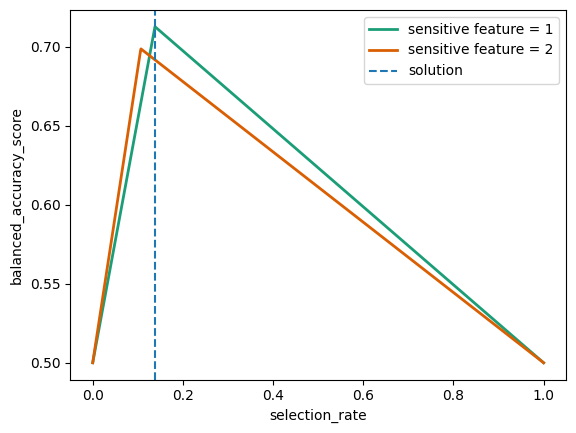

In [12]:
#FIRST TEST ON X2 GENDER
sensitive_train = X_train['X2']
sensitive_test = X_test['X2']
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    objective="balanced_accuracy_score",
    constraints="demographic_parity",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [13]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6471260057026037


array([[<Axes: title={'center': 'accuracy'}, xlabel='X2'>,
        <Axes: title={'center': 'precision'}, xlabel='X2'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X2'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X2'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X2'>,
        <Axes: xlabel='X2'>],
       [<Axes: xlabel='X2'>, <Axes: xlabel='X2'>, <Axes: xlabel='X2'>]],
      dtype=object)

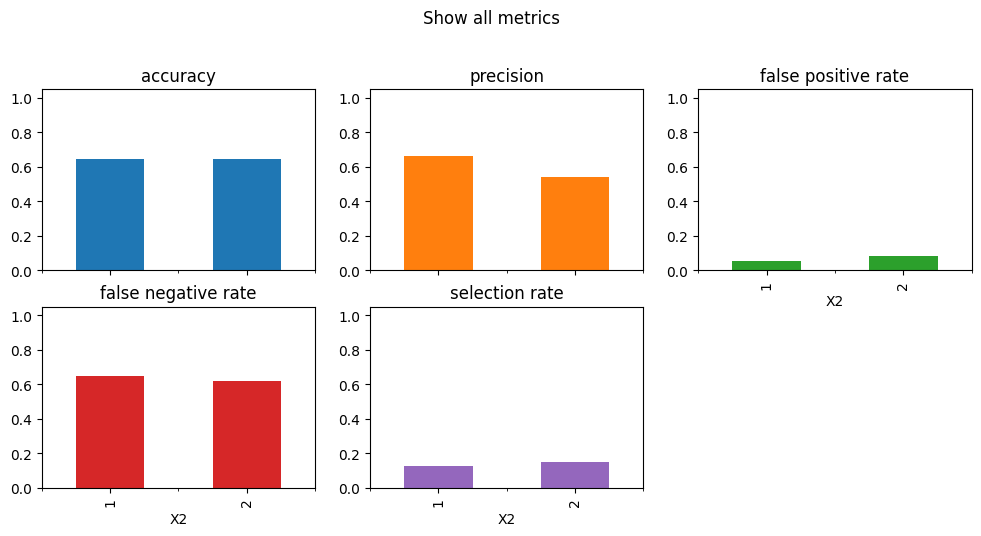

In [14]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [15]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.02361097811953146
Statistical Parity ratio: 0.8398908389403849
Equalized Odds Difference: 0.03117235893088474
Equalized Odds Ratio: 0.637046427366215


##threshold optimizer on X2 with equalized_odds constraint

/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


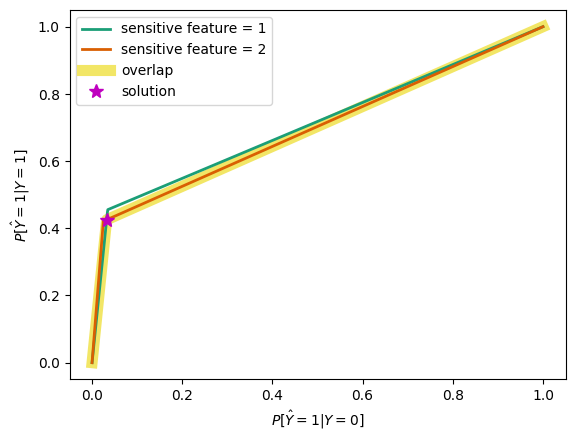

In [ ]:
#SAME AS X2 BUT WITH DIFFRENT CONSTRAINT
sensitive_train = X_train['X2']
sensitive_test = X_test['X2']
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    objective="balanced_accuracy_score",
    constraints="equalized_odds",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [ ]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6486693030958083


array([[<Axes: title={'center': 'accuracy'}, xlabel='X2'>,
        <Axes: title={'center': 'precision'}, xlabel='X2'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X2'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X2'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X2'>,
        <Axes: xlabel='X2'>],
       [<Axes: xlabel='X2'>, <Axes: xlabel='X2'>, <Axes: xlabel='X2'>]],
      dtype=object)

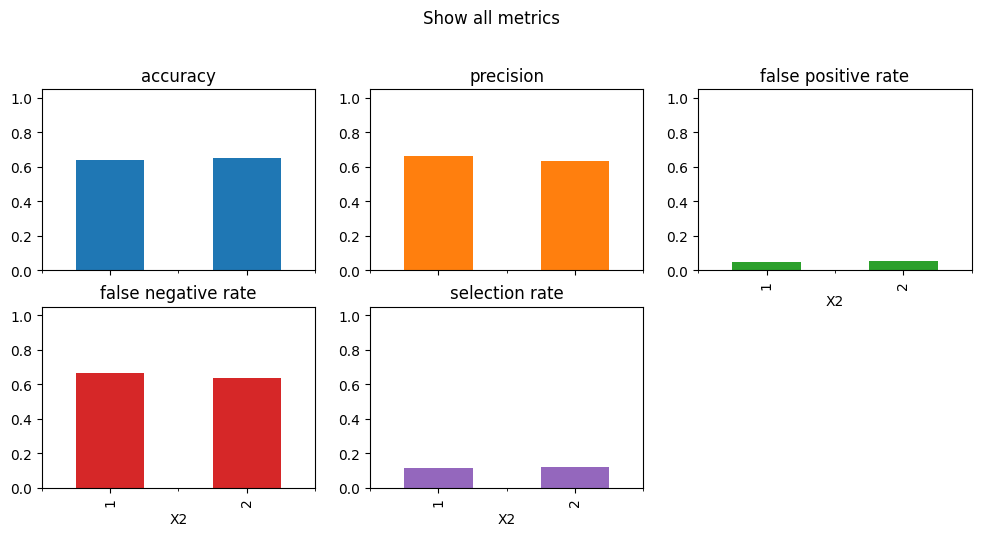

In [ ]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [ ]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.002715109832541626
Statistical Parity ratio: 0.977359385758342
Equalized Odds Difference: 0.029949250616581324
Equalized Odds Ratio: 0.9176942127215849


##threshold optimizer on X3 with demographic_parity constraint

/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


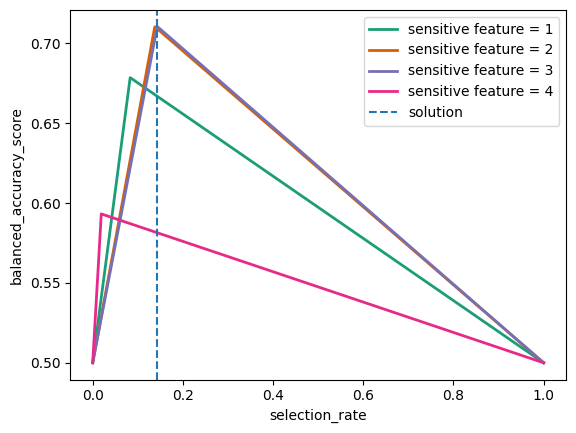

In [26]:
sensitive_train = X_train['X3']
sensitive_test = X_test['X3']
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    objective="balanced_accuracy_score",
    constraints="demographic_parity",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [27]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.639757140408356


array([[<Axes: title={'center': 'accuracy'}, xlabel='X3'>,
        <Axes: title={'center': 'precision'}, xlabel='X3'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X3'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X3'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X3'>,
        <Axes: xlabel='X3'>],
       [<Axes: xlabel='X3'>, <Axes: xlabel='X3'>, <Axes: xlabel='X3'>]],
      dtype=object)

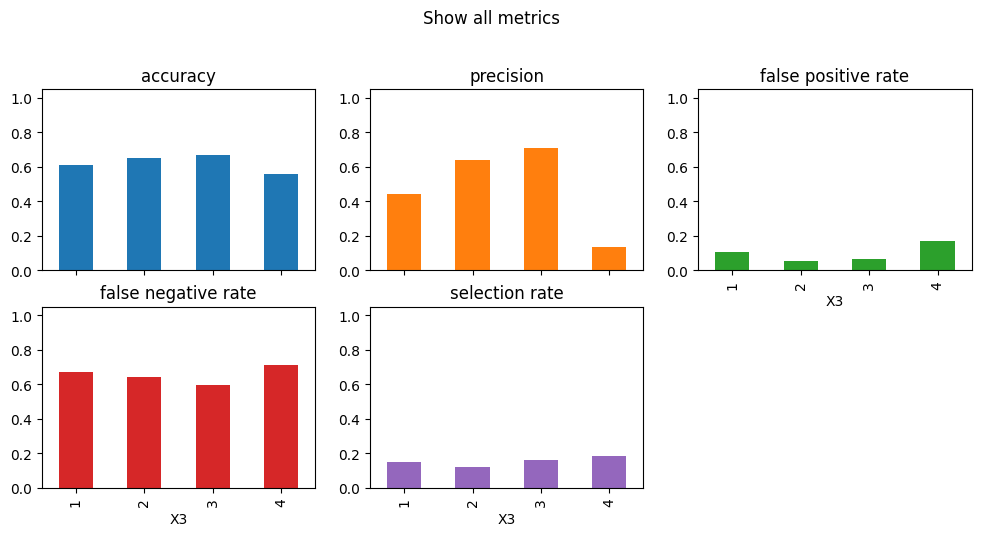

In [28]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [29]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.059784578737507116
Statistical Parity ratio: 0.6731776362349611
Equalized Odds Difference: 0.1180592991913747
Equalized Odds Ratio: 0.3298199078598352


##threshold optimizer on X3 with equalized_odds constraint

/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


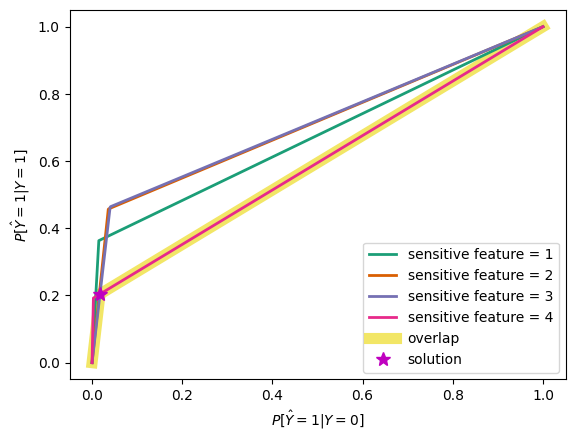

In [30]:
#SAME VARIABLE BUT WITH DIFFRENT CONSTRAINT
sensitive_train = X_train['X3']
sensitive_test = X_test['X3']
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    objective="balanced_accuracy_score",
    constraints="equalized_odds",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [31]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5705571960374008


array([[<Axes: title={'center': 'accuracy'}, xlabel='X3'>,
        <Axes: title={'center': 'precision'}, xlabel='X3'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X3'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X3'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X3'>,
        <Axes: xlabel='X3'>],
       [<Axes: xlabel='X3'>, <Axes: xlabel='X3'>, <Axes: xlabel='X3'>]],
      dtype=object)

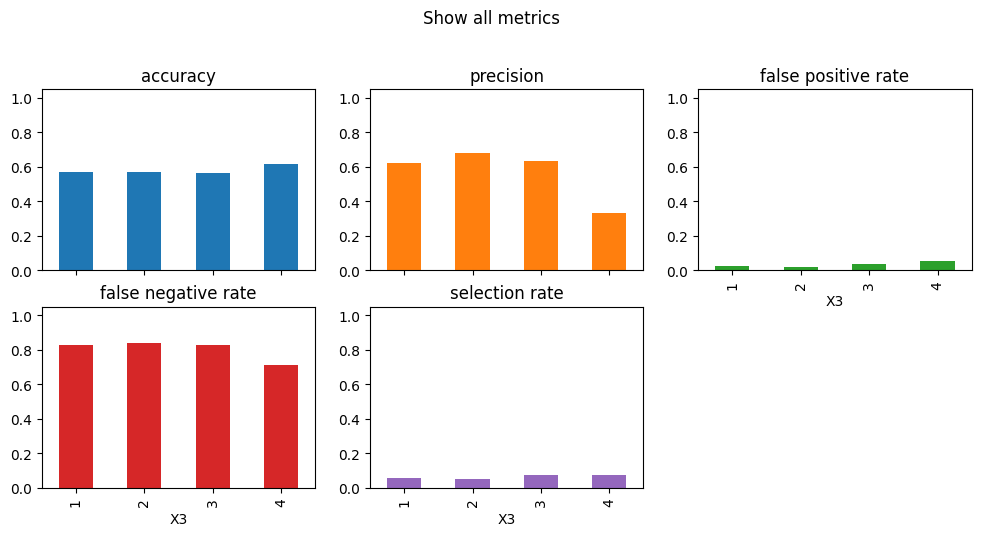

In [32]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [33]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.0230808050040876
Statistical Parity ratio: 0.694098063255684
Equalized Odds Difference: 0.12333486449242076
Equalized Odds Ratio: 0.39984119782214156


##threshold optimizer on X4 with demographic_parity constraint

/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


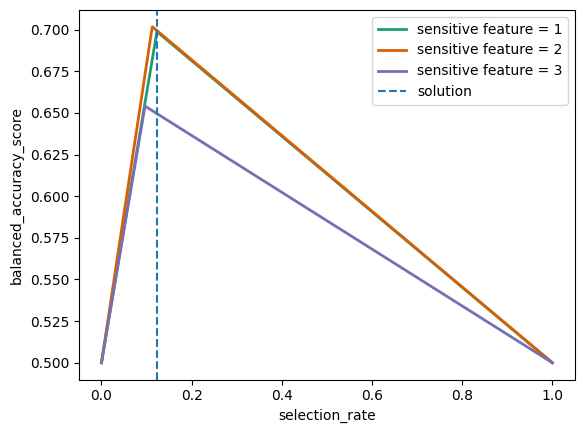

In [38]:
sensitive_train = X_train['X4']
sensitive_test = X_test['X4']
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    objective="balanced_accuracy_score",
    constraints="demographic_parity",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [39]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6453139806786097


array([[<Axes: title={'center': 'accuracy'}, xlabel='X4'>,
        <Axes: title={'center': 'precision'}, xlabel='X4'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X4'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X4'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X4'>,
        <Axes: xlabel='X4'>],
       [<Axes: xlabel='X4'>, <Axes: xlabel='X4'>, <Axes: xlabel='X4'>]],
      dtype=object)

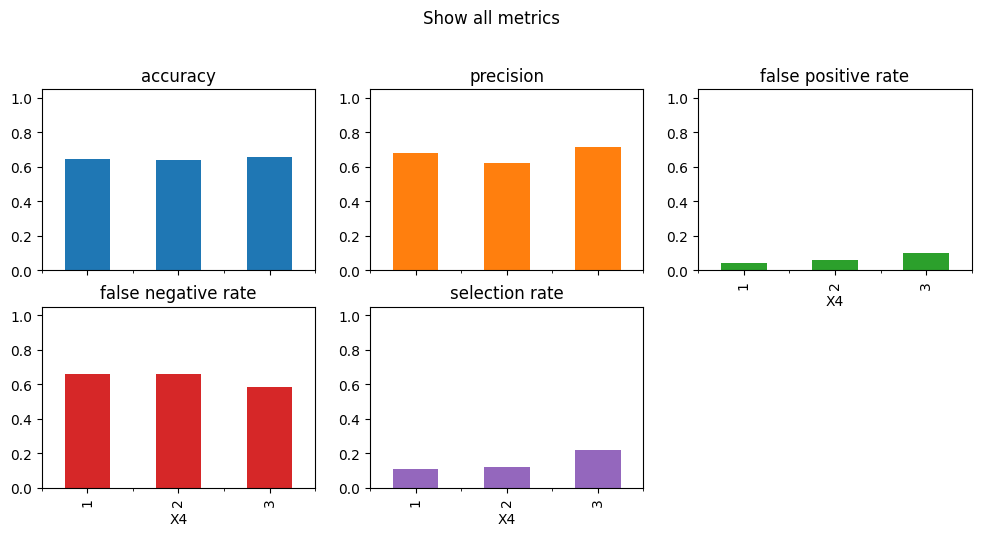

In [40]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [41]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.1076388888888889
Statistical Parity ratio: 0.5079365079365079
Equalized Odds Difference: 0.07508250825082508
Equalized Odds Ratio: 0.4581580177653109


##threshold optimizer on X4 with equalized_odds constraint

/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


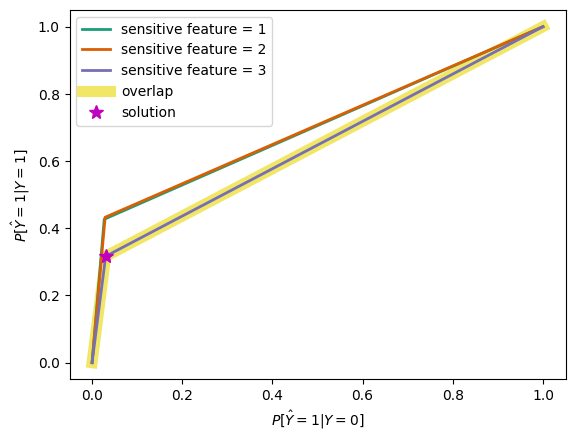

In [42]:
#SAME VARIABLE BUT WITH DIFFRENT CONSTRAINT
sensitive_train = X_train['X4']
sensitive_test = X_test['X4']
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    objective="balanced_accuracy_score",
    constraints="equalized_odds",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [43]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6072431765478297


array([[<Axes: title={'center': 'accuracy'}, xlabel='X4'>,
        <Axes: title={'center': 'precision'}, xlabel='X4'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X4'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X4'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X4'>,
        <Axes: xlabel='X4'>],
       [<Axes: xlabel='X4'>, <Axes: xlabel='X4'>, <Axes: xlabel='X4'>]],
      dtype=object)

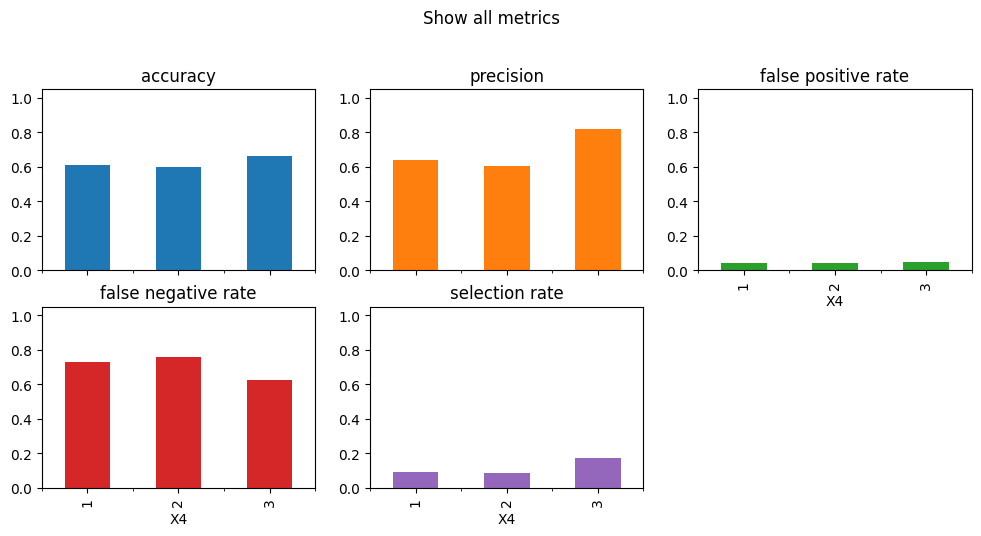

In [44]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [45]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.08345460981749528
Statistical Parity ratio: 0.5144459065163911
Equalized Odds Difference: 0.13109756097560976
Equalized Odds Ratio: 0.6504065040650406
